#Unemployment Analysis - Introductory remarks here

In [1]:
# Importing dependencies

import pandas as pd
import numpy as np
import requests
import datetime

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

We chose to analyze unemployment data from the Federal Reserve Economic Data (FRED).
We accessed the information using an API key from Quandl.

In [ ]:
# Establishing the API call to retrieve raw data
# We are starting builing our dataframe using the "civilian" unemployment
# rate as a baseline or reference for the later analysis.

API_KEY = 'tT8qNAwBZW89z54wPsZy'
url = 'https://www.quandl.com/api/v3/datasets/FRED/UNRATE.json?api_key='+ API_KEY
response = requests.get(url).json()
response


In [27]:
datacodes = ['UNRATE','LNS14000003','LNS14000009','LNU04032183','LNS14000001', 'LNS14000002','LNS14000036','LNS14000089', 'LNS14000091', 'LNS14000093', 'LNS14000006','LNS14027659',
                'LNS14027660','LNS14027662','CGMD25O','CGDD25O']
print(datacodes)

['UNRATE', 'LNS14000003', 'LNS14000009', 'LNU04032183', 'LNS14000001', 'LNS14000002', 'LNS14000036', 'LNS14000089', 'LNS14000091', 'LNS14000093', 'LNS14000006', 'LNS14027659', 'LNS14027660', 'LNS14027662', 'CGMD25O', 'CGDD25O']


In [3]:
#Looking at results of the first API call and and creating a pandas dataframe

demographic = response['dataset']['name']
unemp_rate = response['dataset']['data']
#unemp_rate
civilian = pd.DataFrame(unemp_rate,columns=['date' , demographic]) # converting list to df
civilian


,date,Civilian Unemployment Rate
0,2021-03-01,6.0
1,2021-02-01,6.2
2,2021-01-01,6.3
3,2020-12-01,6.7
4,2020-11-01,6.7
...,...,...
874,1948-05-01,3.5
875,1948-04-01,3.9
876,1948-03-01,4.0
877,1948-02-01,3.8


In [4]:
# Each API call results in one series. We are interested in examining a set of 
# series representing demographic groups. Therefore, we created a function to
# make repeated API calls and the argument passed is a code for each demographic
# group. 

def my_func(a= 'dataset_code'):
    
    API_KEY = 'tT8qNAwBZW89z54wPsZy'
    url = 'https://www.quandl.com/api/v3/datasets/FRED/'+a+'.json?api+key='+API_KEY
    req = requests.get(url).json()
    # print(response) to check results
    demographic = req['dataset']['name']
    unemp_rate = req['dataset']['data']
    df = pd.DataFrame(unemp_rate,columns=['date' , demographic])
    return df

# Making the API calls for our demographic groups of interest.

The first set of API calls is for race/ethnic groups.

NOTE: Because the API calls are slow, please execute API call cells one at a time, so that the program does not 
halt.

In [ ]:
#TANISHA THIS IS DIFFERENT FROM THE LAST NOTEBOOK:
# civilian = pd.DataFrame(unemp_rate,columns=['date' , demographic]) # converting list to df
civilian = my_func(a = 'UNRATE')
time.sleep(1.01)
civilian

In [ ]:
# We use the time.sleep() method to delay the API calls when we are making several of them. 

white = my_func(a = 'LNS14000003')
time.sleep(1.01)
white

In [ ]:
hispanic = my_func(a = 'LNS14000009')
time.sleep(1.01)
#hispanic

In [ ]:
asian = my_func(a= 'LNU04032183')
time.sleep(1.01)
#asian

In [ ]:
african = my_func(a='LNS14000006')
time.sleep(1.01)
#african

This group of API calls is for gender demographic groups:

In [ ]:
men = my_func(a= 'LNS14000001')
time.sleep(1.01)

In [ ]:
women= my_func(a= 'LNS14000002')
time.sleep(1.01)

This group of API calls is for age groups, where age_1 is <25, age_2 is 25-34, age_3 is 35-44, age_4 is 45-54, age_5 is 55 and above:

In [ ]:
age_1 = my_func(a= 'LNS14000036')
time.sleep(1.01)
#age_1

In [ ]:
age_2 = my_func(a= 'LNS14000089')
time.sleep(1.01)
#age_2

In [ ]:
age_3 = my_func(a= 'LNS14000091')
time.sleep(1.01)
#age_3

In [ ]:
age_4= my_func(a= 'LNS14000093')
time.sleep(1.01)

In [ ]:
age_5= my_func(a= 'LNS14024230')
time.sleep(1.01)

This group of API calls is for highest education level, where edu_1 is did not complete high school, edu_2 is high school diploma, edu_3 is  bachelors degree, edu_4 is masters degree, edu_5 is PhD.

In [ ]:
edu_1 = my_func(a= 'LNS14027659')
time.sleep(1.01)

In [ ]:
edu_2 = my_func(a= 'LNS14027660')
time.sleep(1.01)

In [ ]:
edu_3 = my_func(a= 'LNS14027662')
time.sleep(1.01)

In [ ]:
edu_4 = my_func(a= 'CGMD25O')
time.sleep(1.01)

In [ ]:
edu_5 = my_func(a= 'CGDD25O')
time.sleep(1.01)


## Creating the dataframe

In [ ]:
# Creating the larger master dataframe by peforming an outer merge on the 
# common column 'date'. Naming convention
# is race1_df, second merge is race2_df, etc. Future merged dataframes will follow 
# this convention based on the name of the demographic group.

race1_df  = pd.merge(civilian,white,how='outer', on='date')
#race1_df
race2_df=pd.merge(race1_df,hispanic, how='outer', on='date')
race3_df=pd.merge(race2_df,african,how='outer', on='date')
#race3_df
race_df=pd.merge(race3_df,asian,how='outer', on='date')
#printing the final subdataframe "race"
race_df

In [ ]:
#Creating the gender subdataframe, and printing it to check results

gender_df= pd.merge(men,women,how='outer',on='date')
gender_df

In [ ]:
#Creating the age category subdataframe, and printing to check results.

age1_df = pd.merge(age_1, age_2, how='outer',on='date')
age2_df = pd.merge(age1_df, age_3, how='outer',on='date')
age3_df=pd.merge(age2_df, age_4,how='outer',on='date')
age_df = pd.merge(age3_df, age_5,how='outer',on='date')
age_df


In [ ]:
#Creating the education sub dataframe, and printing the results.

edu1_df = pd.merge(edu_1, edu_2, on='date', how='outer')
edu2_df = pd.merge(edu1_df, edu_3, on='date',how='outer')
edu3_df = pd.merge(edu2_df, edu_4, on='date',how='outer')
edu_df=pd.merge(edu3_df, edu_5, on='date',how='outer')
edu_df


In [ ]:
# Creating the master dataframe from the sub dataframes.

master1_df=pd.merge(race_df,gender_df, how='outer',on='date')
master2_df=pd.merge(master1_df,age_df,how='outer',on='date')
unemployment_df=pd.merge(master2_df, edu_df, how = 'outer', on='date')
unemployment_df

# Creating a .csv version of the df for anyone who wants it.
unemployment_df.to_csv('unemployment.csv')

## Wrangling the dataframe

In [5]:
# We are interested in only using the part of the data frame that has no null 
# values, so we need to find out where the are.
# We've had issues with repeated API calls, so we're going to create a
# working dataframe from our saved .csv file
unemployment = pd.read_csv('unemployment.csv')
unemployment.head(20)
unemployment.columns
unemployment.drop(columns = ['Unnamed: 0'], inplace = True)
unemployment

,date,Civilian Unemployment Rate,Unemployment Rate: White,Unemployment Rate: Hispanic or Latino,Unemployment Rate: Black or African American,Unemployment Rate: Asian,Unemployment Rate: Men,Unemployment Rate: Women,Unemployment Rate: 20 to 24 years,Unemployment Rate: 25 to 34 years,Unemployment Rate: 35 to 44 years,Unemployment Rate: 45 to 54 years,Unemployment Rate: 55 years and over,"Unemployment Rate: Less than a High School Diploma, 25 years and over","Unemployment Rate: High School Graduates, No College, 25 years and over","Unemployment Rate: College Graduates: Bachelor's Degree and Higher, 25 years and over","Unemployment Rate - College Graduates - Master's Degree, 25 years and over","Unemployment Rate - College Graduates - Doctoral Degree, 25 years and over"
0,2021-03-01,6.0,5.4,7.9,9.6,5.9,6.2,5.9,10.3,6.7,5.1,4.5,4.5,8.2,6.7,3.7,3.6,1.6
1,2021-02-01,6.2,5.6,8.5,9.9,5.1,6.3,6.1,9.6,6.4,5.7,4.9,5.3,10.1,7.2,3.8,3.6,1.6
2,2021-01-01,6.3,5.7,8.6,9.2,6.8,6.4,6.3,9.7,6.8,5.7,4.9,5.3,9.1,7.1,4.0,3.7,2.3
3,2020-12-01,6.7,6.0,9.3,9.9,5.8,6.7,6.7,11.2,6.6,5.5,5.3,6.0,9.8,7.8,3.8,3.5,1.4
4,2020-11-01,6.7,5.9,8.4,10.3,6.7,6.9,6.4,10.7,7.0,5.6,5.5,5.8,9.2,7.8,4.2,3.5,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1948-05-01,3.5,NaN,NaN,NaN,NaN,3.5,3.7,6.6,3.0,2.6,2.4,3.1,NaN,NaN,NaN,NaN,NaN
875,1948-04-01,3.9,NaN,NaN,NaN,NaN,3.8,4.3,6.8,3.4,2.9,2.6,3.0,NaN,NaN,NaN,NaN,NaN
876,1948-03-01,4.0,NaN,NaN,NaN,NaN,3.8,4.4,7.6,2.9,2.7,2.6,3.0,NaN,NaN,NaN,NaN,NaN
877,1948-02-01,3.8,NaN,NaN,NaN,NaN,3.6,4.5,6.3,3.3,2.5,2.8,3.1,NaN,NaN,NaN,NaN,NaN


In [6]:
# Renaming columns
unemployment.columns = ['Date', 'Civilian','White', 'Hispanic/Latinx','Black/AA', 'Asian', 'Men', 'Women', '20-24','25-34','35-44',
                           '45-54', '>55','Less_than_HS', 'HS', 'College', 'Masters', 'PhD']
#unemployment.columns

In [6]:
# Dropping rows with lots of null values
unemployment.drop(unemployment.index[577:879], inplace = True)
#unemployment.tail(30)

In [12]:
# Sorting by index so that our time series runs forwards in time
unemployment.sort_values(by = ['Date'], inplace = True)
unemployment.head()

,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD
576,1973-03-01,4.9,4.4,7.3,9.4,NaN,4.3,6.0,7.8,4.3,2.9,2.7,2.6,NaN,NaN,NaN,NaN,NaN
575,1973-04-01,5.0,4.5,7.9,9.9,NaN,4.3,6.1,8.0,4.2,2.7,2.8,2.5,NaN,NaN,NaN,NaN,NaN
574,1973-05-01,4.9,4.3,8.1,9.6,NaN,4.3,5.7,7.8,4.5,2.7,2.3,2.5,NaN,NaN,NaN,NaN,NaN
573,1973-06-01,4.9,4.3,7.9,9.8,NaN,4.1,6.0,8.0,4.5,2.7,2.5,2.6,NaN,NaN,NaN,NaN,NaN
572,1973-07-01,4.8,4.2,7.2,9.8,NaN,4.0,6.0,8.1,4.2,2.5,2.3,2.8,NaN,NaN,NaN,NaN,NaN


In [13]:
# Changing date datatype to datetime
unemployment['Date']=pd.to_datetime(unemployment['Date'])
#unemployment.dtypes

## Inspecting the dataframe

In [ ]:
unemployment.shape

In [ ]:
unemployment.info()

In [ ]:
unemployment.describe().round(1)

In [15]:
unemployment.set_index('Date', inplace=True)

# Unemployment Rate Data Analysis

For historical context, here is a time series display of the unemployment rates, including the overall
civilian unemployment rate, which we use as a baseline reference. These records begin at 1973; at that 
time, the Bureau of Labor Statistics was collecting unemployment data on a limited set of demographic 
groups. These were later expanded to include a broader set of races/ethnic groups, and education
levels. In the COVID example below, we we will disagregate the unemployment rates across demographic 
groups. 


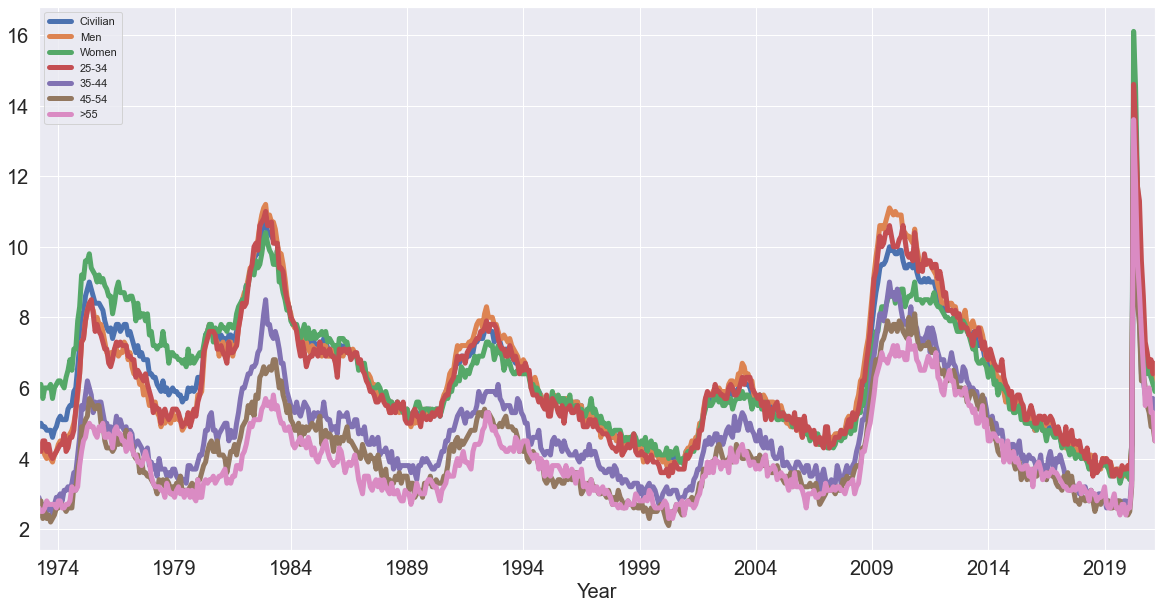

In [16]:
unemployment[['Civilian', 'Men','Women', ]].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Investigating unemployment rates: the COVID years

We are interested in looking at how the unemployment rates changed during the COVID pandemic. Here we have plotted a time series beginning at October 1, 2019, so that we have one fiscal year's data prior to the beginning the pandemic as a reference. 

In [18]:
# Create COVID dataframe by reading .csv 
COVID = pd.read_csv('unemployment.csv')
COVID.drop(columns = ['Unnamed: 0'], inplace = True)
COVID.columns = ['Date', 'Civilian','White', 'Hispanic/Latinx','Black/AA', 'Asian', 'Men', 'Women', '20-24','25-34','35-44',
                           '45-54', '>55','Less_than_HS', 'HS', 'College', 'Masters', 'PhD']
COVID

,Date,Civilian,White,Hispanic/Latinx,Black/AA,Asian,Men,Women,20-24,25-34,35-44,45-54,>55,Less_than_HS,HS,College,Masters,PhD
0,2021-03-01,6.0,5.4,7.9,9.6,5.9,6.2,5.9,10.3,6.7,5.1,4.5,4.5,8.2,6.7,3.7,3.6,1.6
1,2021-02-01,6.2,5.6,8.5,9.9,5.1,6.3,6.1,9.6,6.4,5.7,4.9,5.3,10.1,7.2,3.8,3.6,1.6
2,2021-01-01,6.3,5.7,8.6,9.2,6.8,6.4,6.3,9.7,6.8,5.7,4.9,5.3,9.1,7.1,4.0,3.7,2.3
3,2020-12-01,6.7,6.0,9.3,9.9,5.8,6.7,6.7,11.2,6.6,5.5,5.3,6.0,9.8,7.8,3.8,3.5,1.4
4,2020-11-01,6.7,5.9,8.4,10.3,6.7,6.9,6.4,10.7,7.0,5.6,5.5,5.8,9.2,7.8,4.2,3.5,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1948-05-01,3.5,NaN,NaN,NaN,NaN,3.5,3.7,6.6,3.0,2.6,2.4,3.1,NaN,NaN,NaN,NaN,NaN
875,1948-04-01,3.9,NaN,NaN,NaN,NaN,3.8,4.3,6.8,3.4,2.9,2.6,3.0,NaN,NaN,NaN,NaN,NaN
876,1948-03-01,4.0,NaN,NaN,NaN,NaN,3.8,4.4,7.6,2.9,2.7,2.6,3.0,NaN,NaN,NaN,NaN,NaN
877,1948-02-01,3.8,NaN,NaN,NaN,NaN,3.6,4.5,6.3,3.3,2.5,2.8,3.1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now, we have to restrict the dataframe to the years of interest. We want to drop rows but we need to know
#the indices for the dates, so we will use a filter, commented out below.

#start_date = "2018-09-01"
#end_date= "2021-03-01"

#mask = (COVID['Date'] > start_date) & (COVID['Date'] <= end_date)
#COVID_df = COVID.loc[mask]
#COVID_df.head()

In [ ]:
# Now we know the range of indices to drop. We have to sort our dataframe so that the time series plots forward 
#in time.

COVID.drop(COVID.index[30:879], inplace=True)
COVID.sort_values(by=['Date'], inplace = True)
COVID.set_index('Date', inplace = True)
COVID

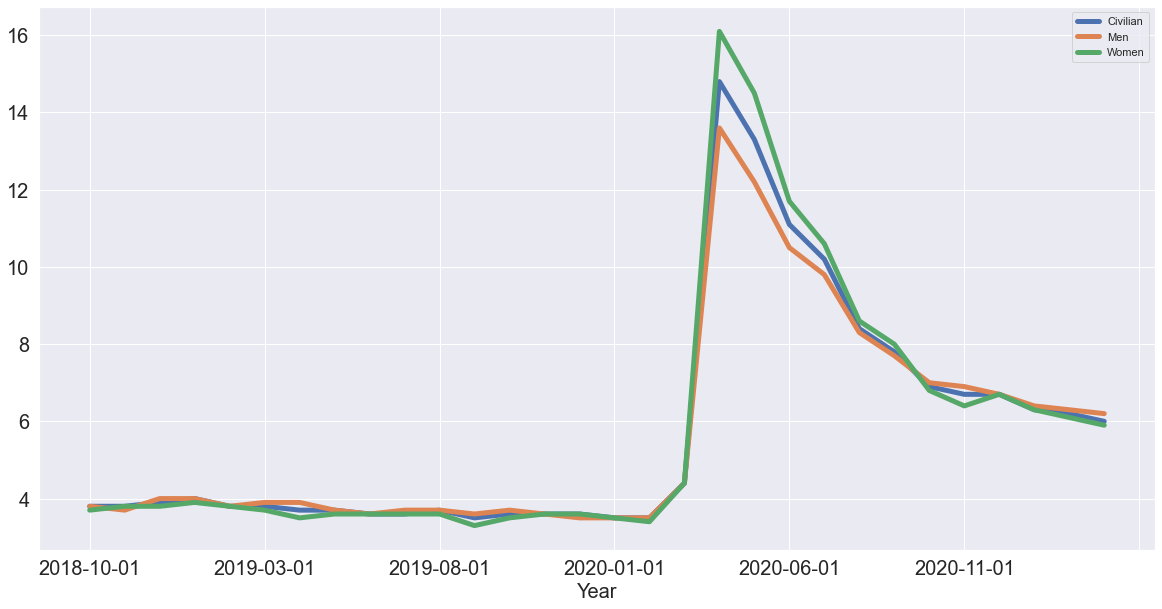

In [20]:
# Breaking down the unemployment rate by gender:
COVID[['Civilian','Men','Women']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

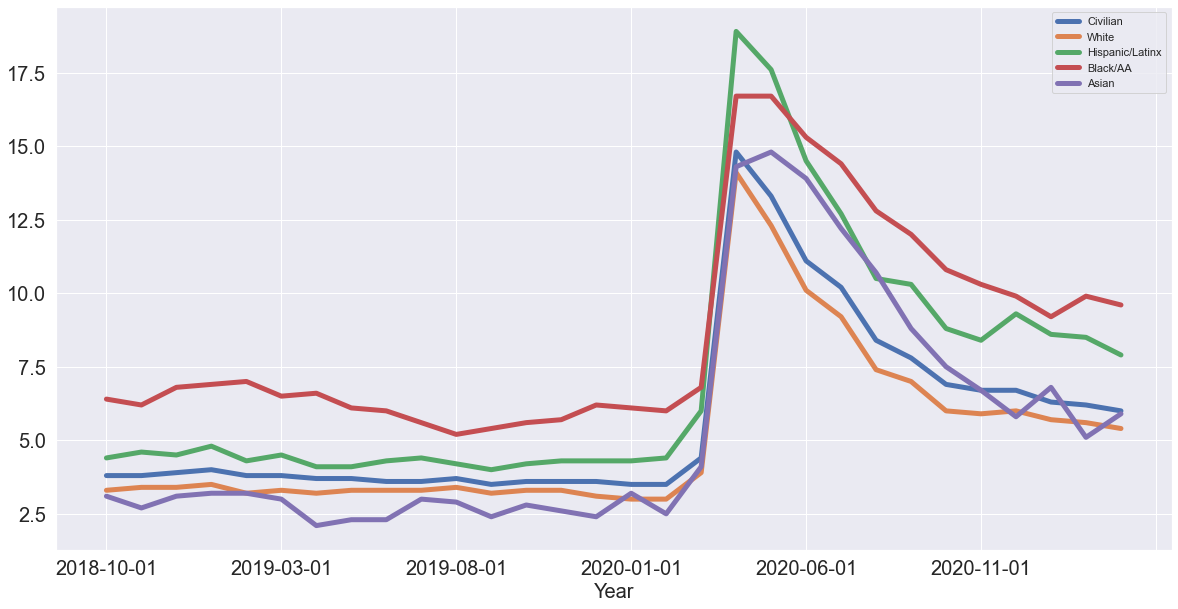

In [11]:
# Breaking down the unemployment rate by race:
COVID[['Civilian','White','Hispanic/Latinx','Black/AA','Asian']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

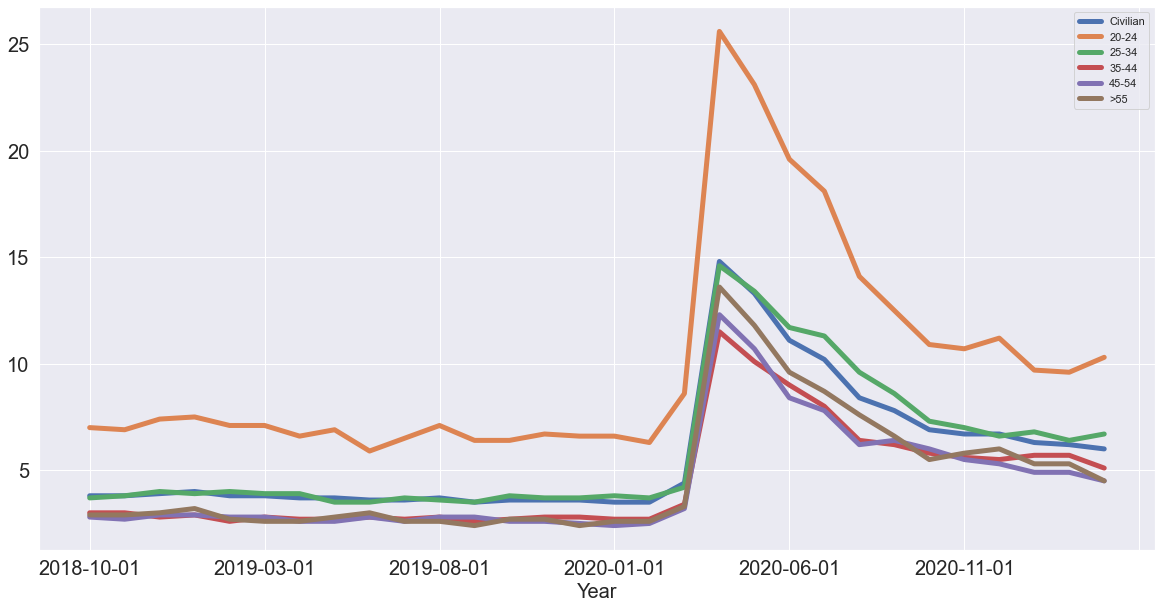

In [12]:
# Breaking down the unemployment rate by age:
COVID[['Civilian','20-24','25-34','35-44','45-54', '>55']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Finally, we consider the relationship between education level and unemployment rate. Note that the level 
of education is for all workers of age 25 and above.

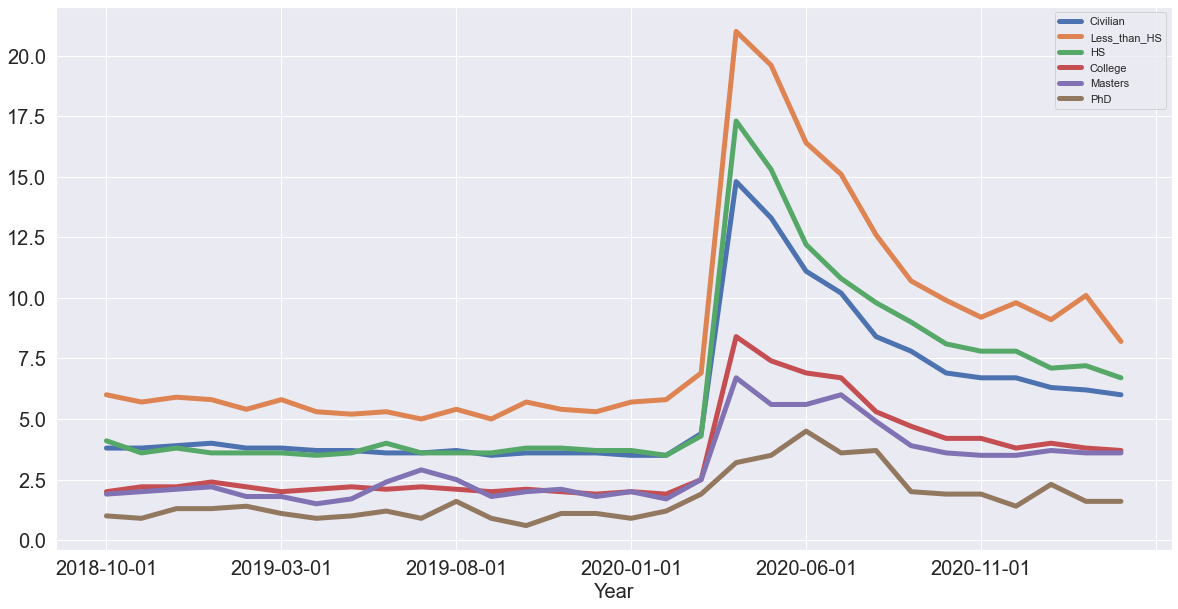

In [13]:
# Breaking down the unemployment rate by highest education level:
COVID[['Civilian','Less_than_HS','HS','College','Masters', 'PhD']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
COVID_df = pd.read_csv('unemployment.csv', index_col = ['date'])
COVID_df.drop(columns = ['Unnamed: 0'], inplace = True)
COVID_df.columns = ['Date', 'Civilian','White', 'Hispanic/Latinx','Black/AA', 'Asian', 'Men', 'Women', '20-24','25-34','35-44',
                           '45-54', '>55','Less_than_HS', 'HS', 'College', 'Masters', 'PhD']
COVID